# Analisis y modelos de prediccion

In [10]:
# Updated Notebook with Latest ML Libraries

# 1. Introduction and Data Loading
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # Updated plotly usage
from sklearn.metrics import recall_score, precision_score # Import missing functions
import tensorflow as tf # Import tensorflow


# Load data


# 2. Data Exploration (same visualizations but updated with plotly express)
# ... [previous exploration code updated with newer visualization syntax]

# 3. Feature Engineering - Updated with better techniques
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


In [4]:
df_credit=pd.read_csv('credit_data-with Target.csv')

In [5]:
df_credit.head(5)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 7, 'classifier__bootstrap': True}

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       175
           1       0.62      0.41      0.50        75

    accuracy                           0.75       250
   macro avg       0.70      0.65      0.66       250
weighted avg       0.73      0.75      0.73       250


ROC AUC Score: 0.7860571428571429


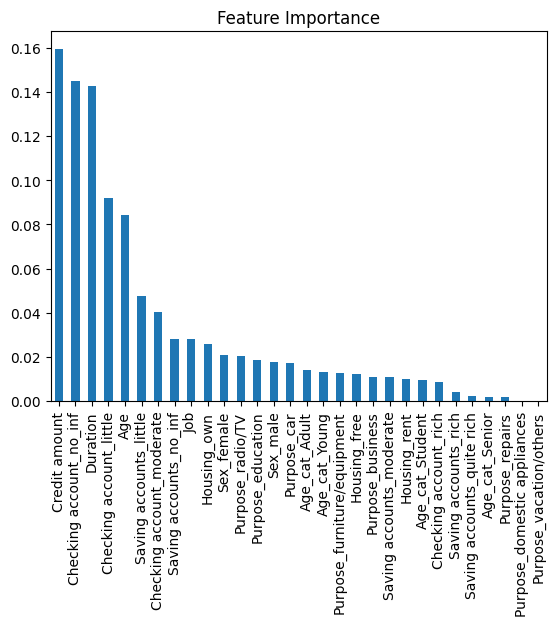

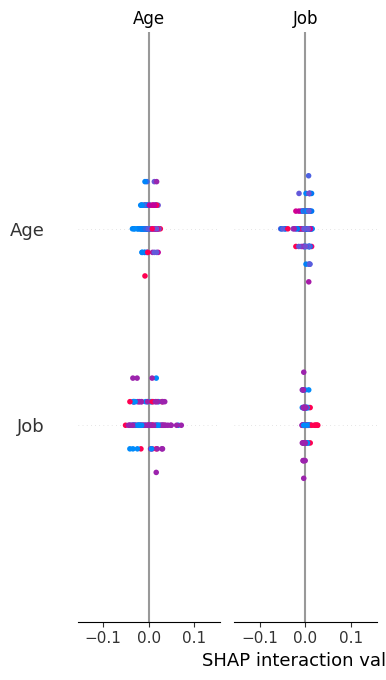

[LightGBM] [Info] Number of positive: 225, number of negative: 525
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300000 -> initscore=-0.847298
[LightGBM] [Info] Start training from score -0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model Comparison:
                 Model  Accuracy   ROC AUC    Recall  Precision  F2 Score
2             CatBoost     0.744  0.790705  0.440000   0.600000  0.464789
0              XGBoost     0.768  0.780114  0.573333   0.623188  0.582656
3        Random Forest     0.756  0.775543  0.413333   0.645833  0.445402
4    Gradient Boosting     0.744  0.774857  0.480000   0.590164  0.498615
1             LightGBM     0.748  0.772267  0.506667   0.593750  0.521978
5  Logistic Regression     0.756  0.754590  0.453333   0.629630  0.480226

SMOTE XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       175
           1       0.60      0.52      0.56        75

    accuracy                           0.75       250
   macro avg       0.70      0.69      0.69       250
weighted avg       0.74      0.75      0.75       250


Cross-validated ROC AUC: 0.758 ± 0.022


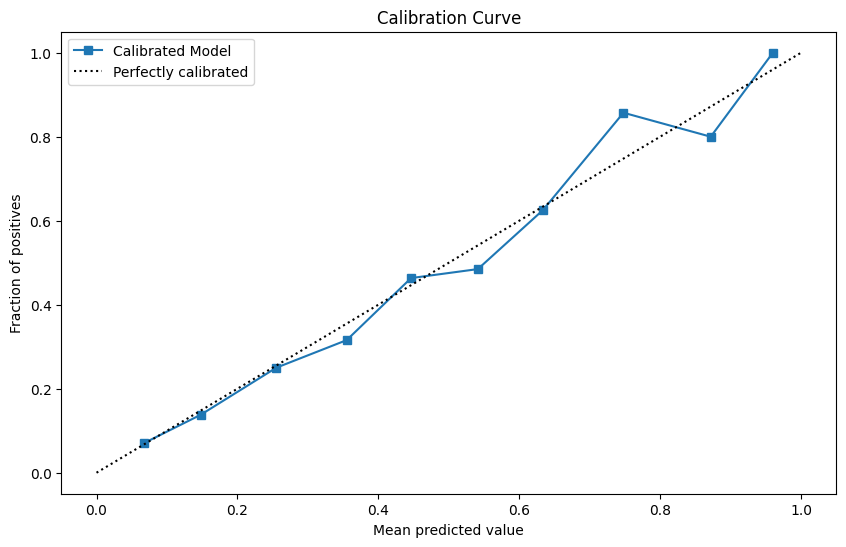

In [7]:
# Handle missing values more robustly
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

# Create age categories
df_credit["Age_cat"] = pd.cut(df_credit.Age, bins=[18, 25, 35, 60, 120],
                             labels=['Student', 'Young', 'Adult', 'Senior'])

# 4. Data Preprocessing - Updated with ColumnTransformer
categorical_features = ['Purpose', 'Sex', 'Housing', 'Saving accounts',
                       'Checking account', 'Age_cat']
numeric_features = ['Age', 'Job', 'Credit amount', 'Duration']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 5. Model Training - Updated with latest libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           fbeta_score, roc_auc_score, precision_recall_curve,
                           average_precision_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Split data
X = df_credit.drop('Risk', axis=1)
y = df_credit['Risk'].map({'good': 0, 'bad': 1})  # Encode target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# 6. Model Pipeline - Updated with better practices
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing and model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 7. Hyperparameter Tuning - Updated with RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    model_pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# 8. Model Evaluation - More comprehensive metrics
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", random_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

# 9. Feature Importance - Using SHAP for interpretability
import shap

# Apply preprocessing to get feature names
preprocessed = best_model.named_steps['preprocessor'].fit_transform(X_train)
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    # Get feature names after one-hot encoding
    cat_features = best_model.named_steps['preprocessor'].named_transformers_['cat']
    cat_feature_names = cat_features.get_feature_names_out(categorical_features)
    all_feature_names = numeric_features + list(cat_feature_names)

    # Plot feature importance
    importances = best_model.named_steps['classifier'].feature_importances_
    feat_imp = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importance')
    plt.show()

# 10. SHAP Values (for tree-based models)
if isinstance(best_model.named_steps['classifier'], (RandomForestClassifier,
                                                  XGBClassifier,
                                                  LGBMClassifier,
                                                  GradientBoostingClassifier)):
    # Sample data for SHAP (since it can be slow on large datasets)
    X_sample = shap.utils.sample(preprocessed, 100)

    explainer = shap.TreeExplainer(best_model.named_steps['classifier'])
    shap_values = explainer.shap_values(X_sample)

    # Summary plot
    shap.summary_plot(shap_values, X_sample, feature_names=all_feature_names)

# 11. Try multiple modern algorithms
models = {
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

results = []
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F2 Score': fbeta_score(y_test, y_pred, beta=2)
    })

results_df = pd.DataFrame(results).sort_values('ROC AUC', ascending=False)
print("\nModel Comparison:")
print(results_df)

# 12. Advanced Techniques - Class Imbalance Handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline

# Try with SMOTE
smote_pipe = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    XGBClassifier(random_state=42)
)

smote_pipe.fit(X_train, y_train)
y_pred_smote = smote_pipe.predict(X_test)
print("\nSMOTE XGBoost Classification Report:")
print(classification_report(y_test, y_pred_smote))

# 13. Cross-Validation with Stratified KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(
    best_model,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

print(f"\nCross-validated ROC AUC: {scores.mean():.3f} ± {scores.std():.3f}")

# 14. Calibration (for better probability estimates)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Calibrate the best model
calibrated = CalibratedClassifierCV(best_model, cv=5, method='isotonic')
calibrated.fit(X_train, y_train)

# Plot calibration curve
prob_pos = calibrated.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Calibrated Model")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.title("Calibration Curve")
plt.legend()
plt.show()

# Graficas

1. Confusion Matrix Heatmap

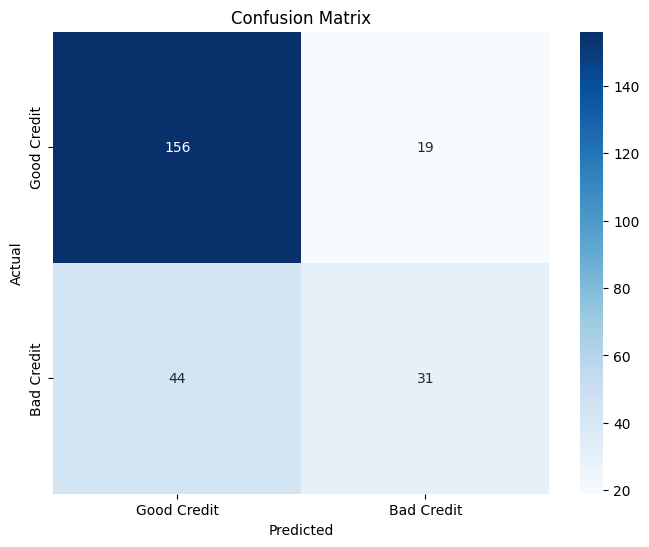

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good Credit', 'Bad Credit'],
            yticklabels=['Good Credit', 'Bad Credit'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

2. ROC Curve

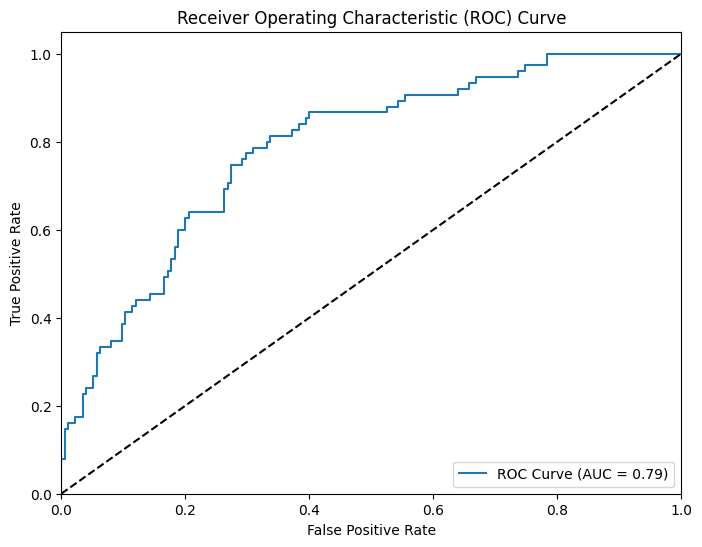

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

3. Precision-Recall Curve

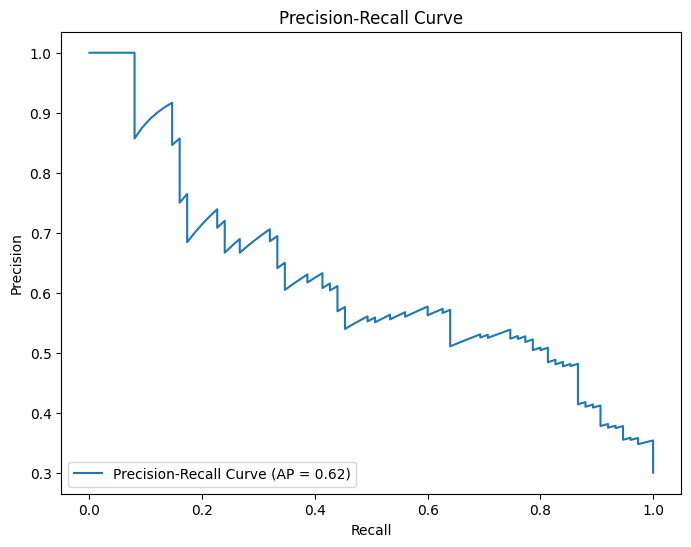

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

 4. Feature Importance (Multiple Models)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 225, number of negative: 525
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300000 -> initscore=-0.847298
[LightGBM] [Info] Start training from score -0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

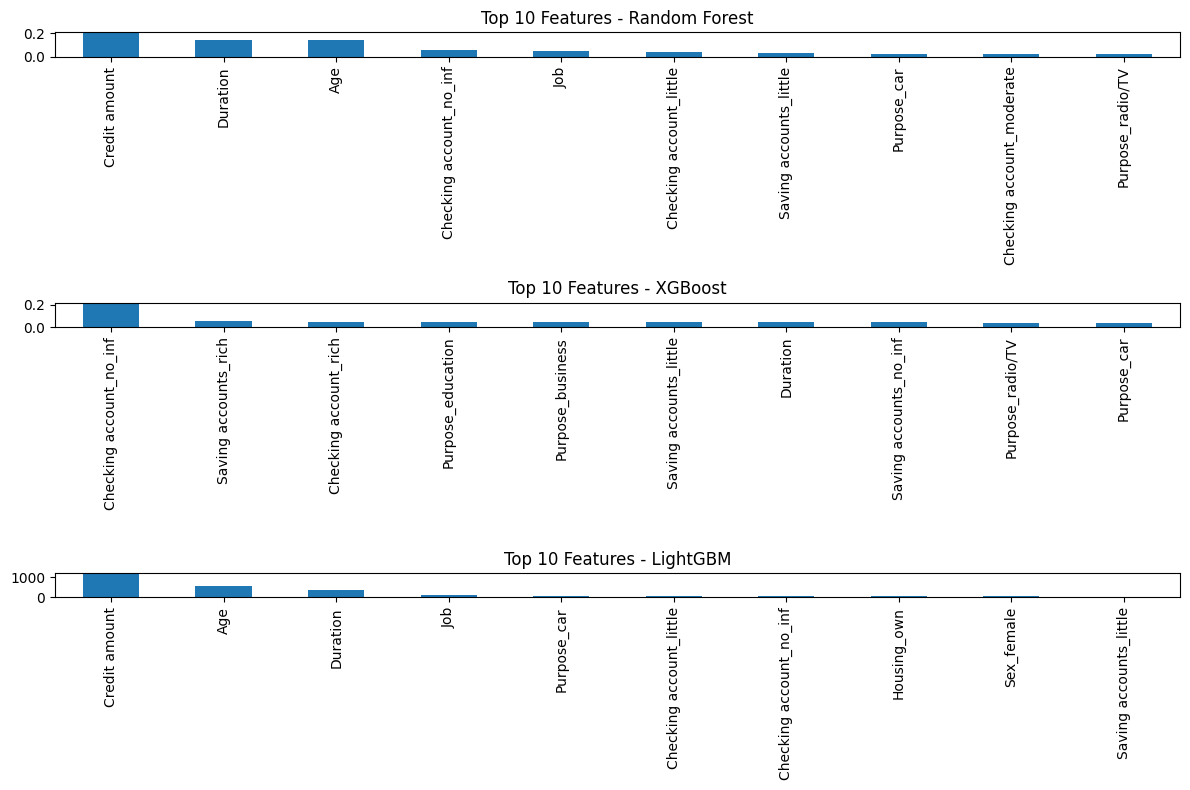

In [ ]:
# Compare feature importance across different models
models_to_compare = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

plt.figure(figsize=(12, 8))
for i, (name, model) in enumerate(models_to_compare.items(), 1):
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)

    # Get feature names
    if hasattr(pipe.named_steps['classifier'], 'feature_importances_'):
        try:
            # For tree-based models
            importances = pipe.named_steps['classifier'].feature_importances_
            feature_names = numeric_features + list(pipe.named_steps['preprocessor']
                                .named_transformers_['cat']
                                .get_feature_names_out(categorical_features))

            # Plot top 10 features
            plt.subplot(3, 1, i)
            pd.Series(importances, index=feature_names).sort_values(ascending=False)[:10].plot(kind='bar')
            plt.title(f'Top 10 Features - {name}')
        except:
            pass

plt.tight_layout()
plt.show()

In [ ]:
5. Probability Distribution Plot

/tmp/ipython-input-32-1559743864.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset, label=f'Actual {"Good" if label == 0 else "Bad"} Credit',
/tmp/ipython-input-32-1559743864.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset, label=f'Actual {"Good" if label == 0 else "Bad"} Credit',


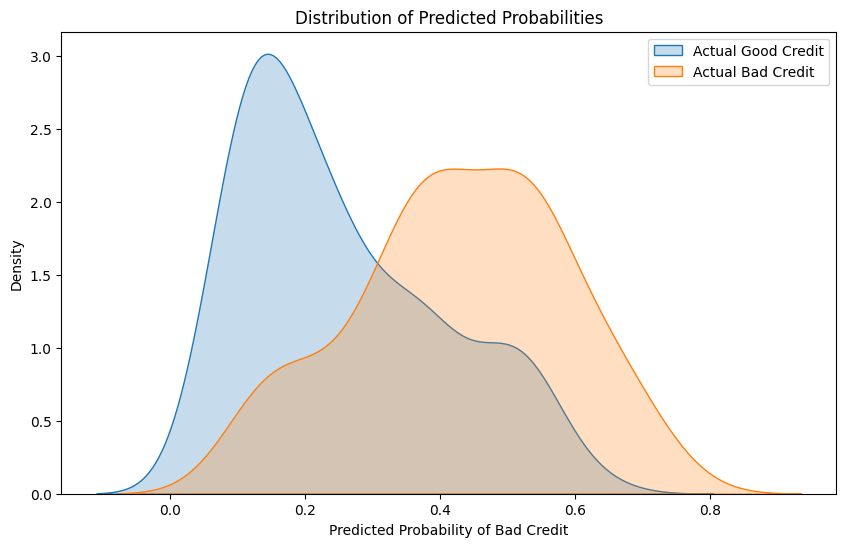

In [ ]:
# Plot distribution of predicted probabilities
plt.figure(figsize=(10, 6))
for label in [0, 1]:
    subset = y_proba[y_test == label]
    sns.kdeplot(subset, label=f'Actual {"Good" if label == 0 else "Bad"} Credit',
                shade=True)
plt.xlabel('Predicted Probability of Bad Credit')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

6. Cumulative Gains Chart

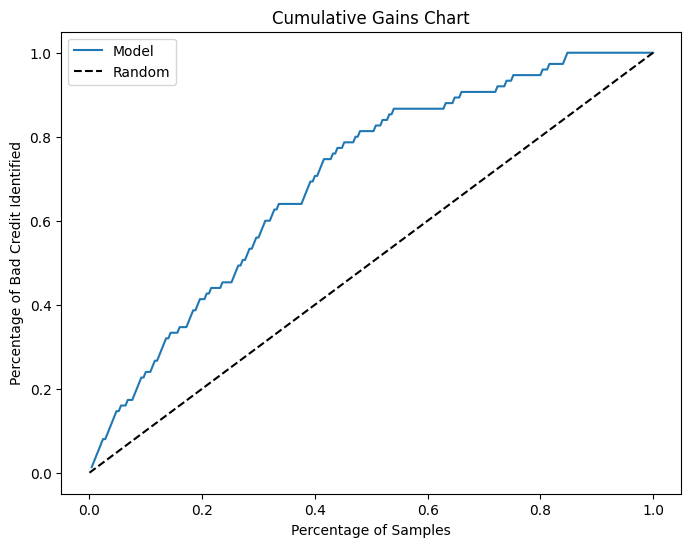

In [ ]:
def plot_cumulative_gain(y_true, y_proba, pos_label=1):
    # Sort by predicted probability
    df = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    df = df.sort_values('y_proba', ascending=False).reset_index(drop=True)

    # Calculate cumulative gains
    df['cumulative_bad'] = df['y_true'].cumsum()
    df['percentage_bad'] = df['cumulative_bad'] / df['y_true'].sum()
    df['percentage_samples'] = (df.index + 1) / len(df)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(df['percentage_samples'], df['percentage_bad'], label='Model')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('Percentage of Samples')
    plt.ylabel('Percentage of Bad Credit Identified')
    plt.title('Cumulative Gains Chart')
    plt.legend()
    plt.show()

plot_cumulative_gain(y_test, y_proba)

7. Lift Chart

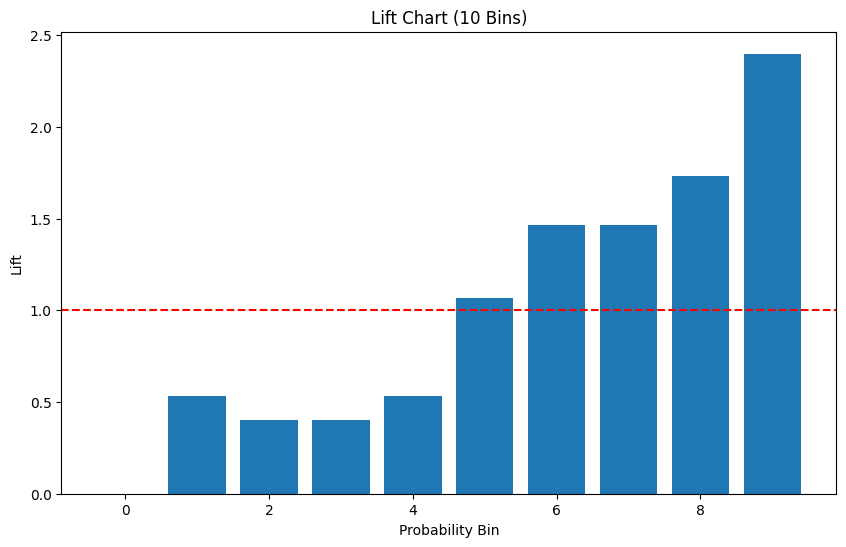

In [ ]:
def plot_lift_chart(y_true, y_proba, pos_label=1, n_bins=10):
    # Bin the predicted probabilities
    df = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    df['bin'] = pd.qcut(df['y_proba'], q=n_bins, labels=False)

    # Calculate lift statistics
    bin_stats = df.groupby('bin').agg({
        'y_true': ['mean', 'count']
    })
    bin_stats.columns = ['bad_rate', 'count']
    bin_stats['lift'] = bin_stats['bad_rate'] / df['y_true'].mean()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(bin_stats.index, bin_stats['lift'])
    plt.axhline(1, color='red', linestyle='--')
    plt.xlabel('Probability Bin')
    plt.ylabel('Lift')
    plt.title(f'Lift Chart ({n_bins} Bins)')
    plt.show()

plot_lift_chart(y_test, y_proba)

8. Model Comparison Bar Chart

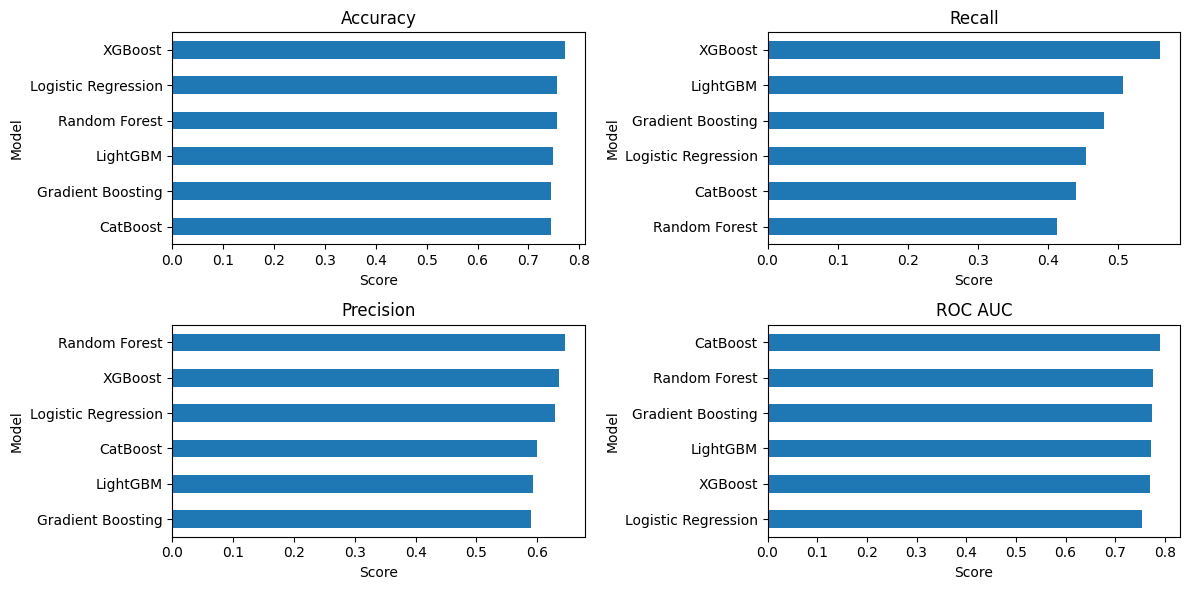

In [ ]:
# Compare multiple models visually
metrics_to_compare = ['Accuracy', 'Recall', 'Precision', 'ROC AUC']

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics_to_compare, 1):
    plt.subplot(2, 2, i)
    results_df.set_index('Model')[metric].sort_values().plot(kind='barh')
    plt.title(metric)
    plt.xlabel('Score')

plt.tight_layout()
plt.show()

9. Threshold Analysis

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

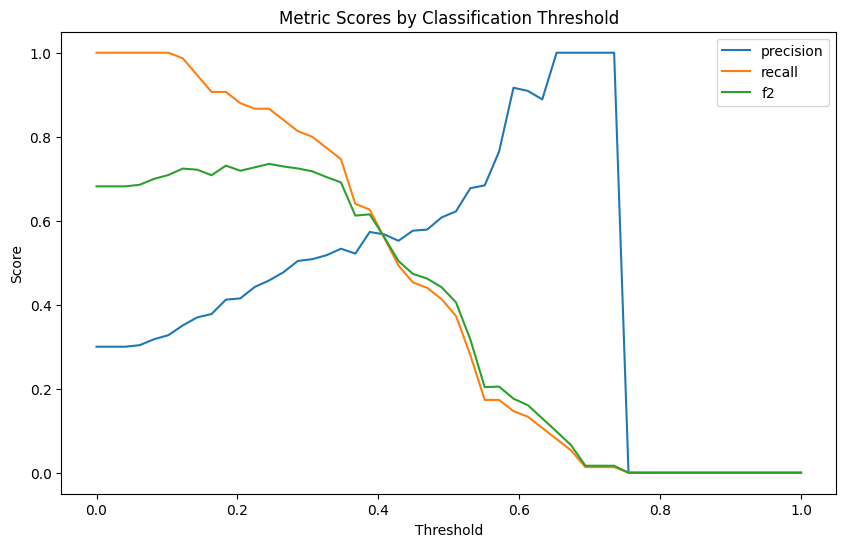

In [ ]:
# Analyze how metrics change with different thresholds
thresholds = np.linspace(0, 1, 50)
metrics = {'precision': [], 'recall': [], 'f2': []}

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    metrics['precision'].append(precision_score(y_test, y_pred_t))
    metrics['recall'].append(recall_score(y_test, y_pred_t))
    metrics['f2'].append(fbeta_score(y_test, y_pred_t, beta=2))

plt.figure(figsize=(10, 6))
for metric, values in metrics.items():
    plt.plot(thresholds, values, label=metric)

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metric Scores by Classification Threshold')
plt.legend()
plt.show()

10. SHAP Summary Plot (For Model Interpretation)

<Figure size 1200x800 with 0 Axes>

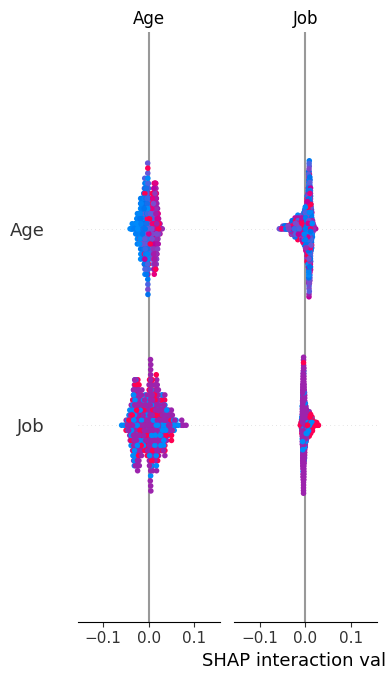

In [ ]:
import shap

# For tree-based models only
if isinstance(best_model.named_steps['classifier'],
             (RandomForestClassifier, XGBClassifier, LGBMClassifier)):
    # Prepare SHAP explainer
    explainer = shap.TreeExplainer(best_model.named_steps['classifier'])

    # Get preprocessed data
    X_train_preprocessed = best_model.named_steps['preprocessor'].transform(X_train)

    # Calculate SHAP values (sample for speed)
    shap_values = explainer.shap_values(X_train_preprocessed[:1000])

    # Get feature names
    feature_names = numeric_features + list(best_model.named_steps['preprocessor']
                          .named_transformers_['cat']
                          .get_feature_names_out(categorical_features))

    # Plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_train_preprocessed[:1000],
                     feature_names=feature_names, plot_type="bar")
    plt.show()

# Modelos avanzados

1. Neural Network Implementation (TensorFlow/Keras)

In [9]:
# Neural Network Implementation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5386 - auc: 0.5078 - loss: 0.7463 - precision: 0.2838 - recall: 0.3318 - val_accuracy: 0.7280 - val_auc: 0.6915 - val_loss: 0.6214 - val_precision: 0.6522 - val_recall: 0.2000
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7299 - auc: 0.6807 - loss: 0.5681 - precision: 0.5687 - recall: 0.4261 - val_accuracy: 0.7520 - val_auc: 0.7347 - val_loss: 0.5866 - val_precision: 0.7097 - val_recall: 0.2933
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7565 - auc: 0.7640 - loss: 0.5161 - precision: 0.6343 - recall: 0.4279 - val_accuracy: 0.7400 - val_auc: 0.7577 - val_loss: 0.5631 - val_precision: 0.6389 - val_recall: 0.3067
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7590 - auc: 0.7529 - loss: 0.5204 - precision: 0.5866 - recall: 0.4500 - val_accuracy: 0.7360 - val_auc: 0.7650 - val_loss: 0.5460 - val_precision: 0.6154 - val_recall: 0.3200
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

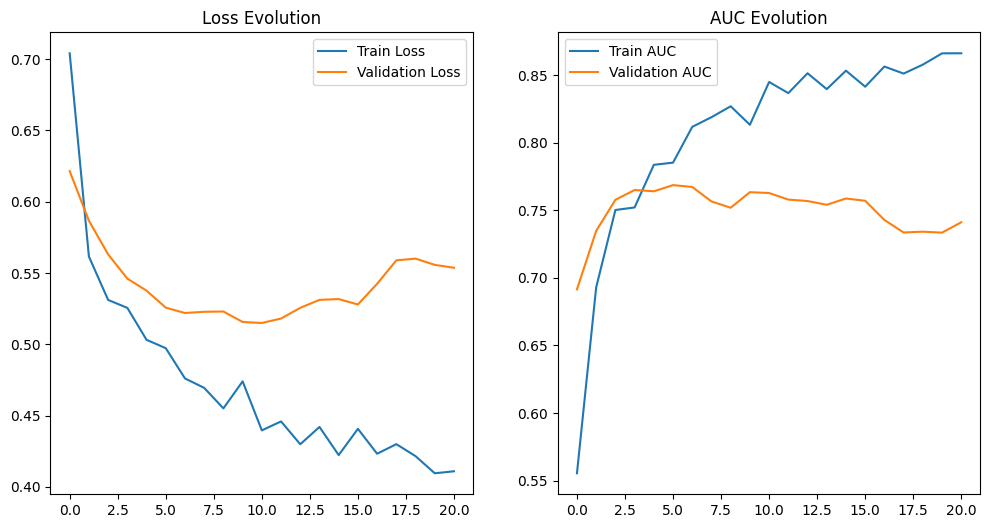

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       175
           1       0.61      0.40      0.48        75

    accuracy                           0.74       250
   macro avg       0.69      0.65      0.66       250
weighted avg       0.73      0.74      0.73       250



In [11]:
# Preprocess data specifically for neural network
# Get feature names after preprocessing
preprocessor.fit(X_train)
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get feature names
numeric_features = ['Age', 'Job', 'Credit amount', 'Duration']
categorical_features = ['Purpose', 'Sex', 'Housing', 'Saving accounts', 'Checking account', 'Age_cat']
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_feature_names)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)
X_test_scaled = scaler.transform(X_test_preprocessed)

# Build neural network
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model_nn.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy',
                        tf.keras.metrics.AUC(name='auc'),
                        tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.Precision(name='precision')])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model_nn.fit(X_train_scaled, y_train,
                      validation_data=(X_test_scaled, y_test),
                      epochs=100,
                      batch_size=32,
                      callbacks=[early_stop],
                      verbose=1)

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('AUC Evolution')
plt.legend()
plt.show()

# Evaluate neural network
y_pred_nn = (model_nn.predict(X_test_scaled) > 0.5).astype(int)
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

2. SHAP Explainability for All Models

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_9
Received: inputs=['Tensor(shape=(100, 30))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_9
Received: inputs=['Tensor(shape=(200, 30))']
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

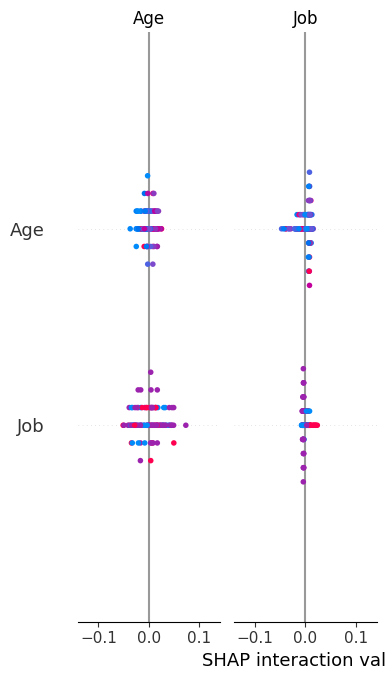

In [34]:
# SHAP Analysis for Model Explainability
import shap

def explain_model(model, X_train_sample, model_type='tree'):
    """
    Generate SHAP explanations for different model types
    """
    if model_type == 'tree':
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train_sample)
    elif model_type == 'linear':
        explainer = shap.LinearExplainer(model, X_train_sample)
        shap_values = explainer.shap_values(X_train_sample)
    elif model_type == 'nn':
        explainer = shap.DeepExplainer(model, X_train_sample)
        shap_values = explainer.shap_values(X_train_sample)[0]

    return explainer, shap_values

# Sample data for SHAP (for performance)
sample_idx = np.random.choice(X_train_preprocessed.shape[0], 100, replace=False)
X_train_sample = X_train_preprocessed[sample_idx]

# SHAP for Random Forest
rf_model = random_search.best_estimator_.named_steps['classifier']
explainer_rf, shap_values_rf = explain_model(rf_model, X_train_sample)

# SHAP for Neural Network
explainer_nn, shap_values_nn = explain_model(model_nn, X_train_scaled[sample_idx], 'nn')

# Plot SHAP summary
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values_rf, X_train_sample, feature_names=all_feature_names, plot_type="bar")



3. Comparative Analysis Section

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<Figure size 1200x600 with 0 Axes>

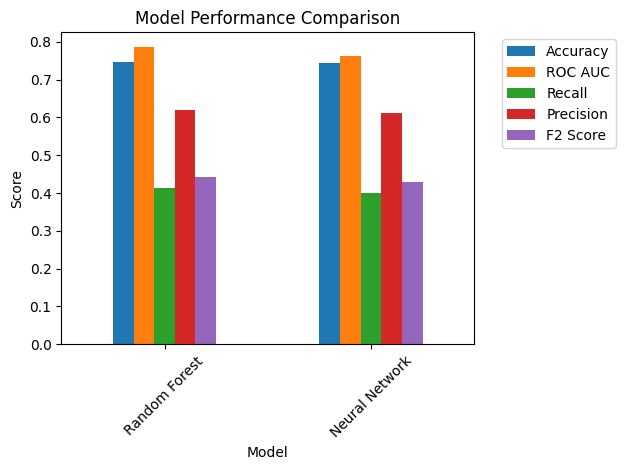

In [38]:
# Comparative Analysis of All Models
results = []

# Function to evaluate model
def evaluate_model(name, model, X_test, y_test):
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.predict(X_test)
    y_pred = (y_proba > 0.5).astype(int)

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F2 Score': fbeta_score(y_test, y_pred, beta=2)
    }

# Evaluate all models
results.append(evaluate_model('Random Forest', random_search.best_estimator_, X_test, y_test))
results.append(evaluate_model('Neural Network', model_nn, X_test_scaled, y_test))

# Add other models as needed (XGBoost, Logistic Regression, etc.)

# Create results dataframe
results_df = pd.DataFrame(results).sort_values('ROC AUC', ascending=False)

# Plot comparison
plt.figure(figsize=(12, 6))
results_df.set_index('Model').plot(kind='bar', rot=45)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

4. Model Deployment Considerations

In [44]:
# Model Deployment Considerations
print("\nModel Deployment Characteristics:")
print(f"{'Model':<20} {'Size (MB)':<15} {'Prediction Time (ms)':<20}")
print("-"*55)

import time
from joblib import dump
import os

def evaluate_deployment(model, model_name, X_sample):
    # Save model
    dump(model, f'{model_name}.joblib')
    size = os.path.getsize(f'{model_name}.joblib') / (1024*1024)

    # Prediction time
    start = time.time()
    if hasattr(model, 'predict_proba'):
        model.predict_proba(X_sample)
    else:
        model.predict(X_sample)
    pred_time = (time.time() - start) * 1000

    print(f"{model_name:<20} {size:<15.2f} {pred_time:<20.2f}")

# Evaluate deployment characteristics
evaluate_deployment(random_search.best_estimator_, 'Random Forest', X_test)
evaluate_deployment(model_nn, 'Neural Network', X_test_scaled)


Model Deployment Characteristics:
Model                Size (MB)       Prediction Time (ms)
-------------------------------------------------------
Random Forest        1.34            27.99               
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Neural Network       0.22            114.71              
